In [7]:
import pandas as pd

# df = pd.read_csv("data/nyc_bikeshare.csv")
# df = df.sample(n=1_000_000)

In [8]:
df = pd.read_csv("data/nyc_sampled.csv")

In [9]:
nyc = df

In [10]:
from collections import defaultdict

rows = 0
times = defaultdict(list)
for entry in nyc["starttime"]:
    parts = entry.split(" ")
    times["date"].append(parts[0])
    date = parts[0].split("-")
    times["year"].append(date[0])
    times["month"].append(date[1])
    times["day"].append(date[2])
    times["time_of_day"].append(parts[1][:2])
    rows += 1
    if (rows % 100000 == 0):
        print(f"processed {rows} rows")
times_df = pd.DataFrame(times)

processed 100000 rows
processed 200000 rows
processed 300000 rows
processed 400000 rows
processed 500000 rows
processed 600000 rows
processed 700000 rows
processed 800000 rows
processed 900000 rows
processed 1000000 rows


In [11]:
nyc = nyc.join(times_df)

In [12]:
w = pd.read_csv("data/nyc_daily_weather.csv")

from datetime import datetime
def date_to_days(date):
    date = datetime.strptime(date, "%m/%d/%y %H:%M")
    return date.strftime("%m-%d-%y")
  #return "-".join(date.split(" ")[0].split("/"))

w["date"] = w["DATE"].apply(date_to_days)

In [13]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date
0,1/1/13 23:59,33.0,0.0,15.0,01-01-13
1,1/2/13 23:59,28.0,0.0,15.0,01-02-13
2,1/3/13 23:59,28.0,0.0,13.0,01-03-13
3,1/4/13 23:59,34.0,0.0,18.0,01-04-13
4,1/5/13 23:59,37.0,0.0,17.0,01-05-13


In [14]:
nyc.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,date,year,month,day,time_of_day
0,11835048,1096,02-27-17 15:46:12,02-27-17 16:04:28,3126.0,3131.0,27693,1.0,1994.0,1,02-27-17,02,27,17,15
1,21283052,943,12-11-18 09:29:24,12-11-18 09:45:07,3141.0,3431.0,35240,1.0,1964.0,1,12-11-18,12,11,18,09
2,782245,665,09-06-13 17:02:06,09-06-13 17:13:11,545.0,517.0,17458,1.0,1978.0,1,09-06-13,09,06,13,17
3,8838053,332,06-25-16 18:39:25,06-25-16 18:44:58,3162.0,3164.0,20529,1.0,1977.0,1,06-25-16,06,25,16,18
4,18541133,911,06-30-18 08:39:54,06-30-18 08:55:06,3610.0,3119.0,18070,1.0,1983.0,1,06-30-18,06,30,18,08


In [15]:
trips_per_day = nyc.groupby("date")["tripduration"].count()

In [16]:
trips_per_day = pd.DataFrame(trips_per_day)

In [17]:
w = w.join(trips_per_day, on="date")

In [18]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date,tripduration
0,1/1/13 23:59,33.0,0.0,15.0,01-01-13,NaN
1,1/2/13 23:59,28.0,0.0,15.0,01-02-13,NaN
2,1/3/13 23:59,28.0,0.0,13.0,01-03-13,NaN
3,1/4/13 23:59,34.0,0.0,18.0,01-04-13,NaN
4,1/5/13 23:59,37.0,0.0,17.0,01-05-13,NaN


In [19]:
w = w.dropna()

In [20]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date,tripduration
151,6/1/13 23:59,82.0,0.0,12.0,06-01-13,109.0
152,6/2/13 23:59,79.0,0.0,15.0,06-02-13,189.0
153,6/3/13 23:59,72.0,0.0,12.0,06-03-13,90.0
154,6/4/13 23:59,66.0,0.0,13.0,06-04-13,186.0
155,6/5/13 23:59,66.0,0.0,10.0,06-05-13,168.0


In [21]:
def daysFrom(date):
    startDate = datetime.strptime('6/1/2013', "%m/%d/%Y")
    endDate = datetime.strptime(date, "%m-%d-%y")
    return (endDate-startDate).days

w["daysFrom"] = w["date"].apply(daysFrom)

In [22]:
w.columns.values

array(['DATE', 'DailyAverageDryBulbTemperature', 'DailySnowDepth',
       'DailySustainedWindSpeed', 'date', 'tripduration', 'daysFrom'],
      dtype=object)

In [23]:
import seaborn as sns

fig = sns.regplot(w["DailyAverageDryBulbTemperature"], w["tripduration"], scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.set_title("Bike Usage vs Temperature")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Average Temperature")
out = fig.get_figure()
out.savefig("temp_usage.png")

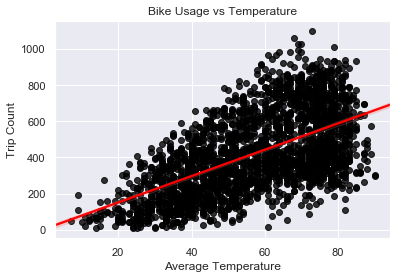

In [44]:
import seaborn as sns
sns.set()
fig = sns.regplot(w["DailyAverageDryBulbTemperature"], w["tripduration"], scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.set_title("Bike Usage vs Temperature")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Average Temperature")
out = fig.get_figure()
out.savefig("temp_usage.png")

In [25]:
w.columns.values

array(['DATE', 'DailyAverageDryBulbTemperature', 'DailySnowDepth',
       'DailySustainedWindSpeed', 'date', 'tripduration', 'daysFrom'],
      dtype=object)

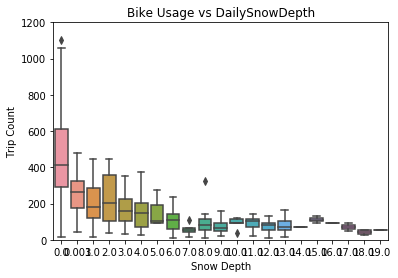

In [36]:
fig = sns.boxplot(w["DailySnowDepth"], w["tripduration"])
fig.set_title("Bike Usage vs DailySnowDepth")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Snow Depth")
fig.set_ylim([0, 1200])
out = fig.get_figure()
out.savefig("snow_usage.png")

Text(0.5, 0, 'Snow Depth')

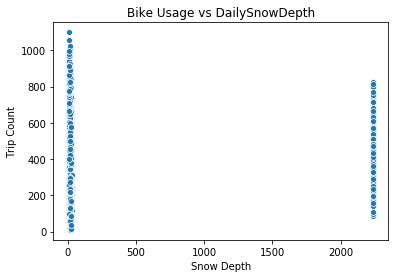

In [37]:
fig = sns.scatterplot(w["DailySustainedWindSpeed"], w["tripduration"])
fig.set_title("Bike Usage vs DailySnowDepth")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Snow Depth")
# fig.set_ylim([0, 1200])
# out = fig.get_figure()
# out.savefig("snow_usage.png")

In [38]:
w["DailySustainedWindSpeed"].describe()

count    2359.000000
mean      162.465451
std       555.956263
min         5.000000
25%        10.000000
50%        14.000000
75%        16.000000
max      2237.000000
Name: DailySustainedWindSpeed, dtype: float64

In [39]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date,tripduration,daysFrom
151,6/1/13 23:59,82.0,0.0,12.0,06-01-13,109.0,0
152,6/2/13 23:59,79.0,0.0,15.0,06-02-13,189.0,1
153,6/3/13 23:59,72.0,0.0,12.0,06-03-13,90.0,2
154,6/4/13 23:59,66.0,0.0,13.0,06-04-13,186.0,3
155,6/5/13 23:59,66.0,0.0,10.0,06-05-13,168.0,4


In [42]:
w.to_csv("aggregate_data.csv", index=False)